<center>
<h1>CSCI3151 - Foundations of Machine Learning</h1>
<h2>Assignment 4</h2>

<b> Due on: April 10, 2024 at 23:59 ADT</b>

<small>(One submission per group, and you must list all group members at the top of that submission)</small>
</center>

[Assignment Submission Instructions](https://docs.google.com/document/d/1iHzvkaZzNyZJ54Qw4eXJYOC2vzQUPliMyEBbZVRiS4Q/edit?usp=sharing)

## **1. Multivariate Gaussians and k-means**

We're going to generate a dataset of Multivariate Gaussians and cluster it using the k-means algorithm. We will then use the silhouette score to evaluate the clustering.


**a**) Create and plot a dataset using only `numpy` and `matplotlib` that looks similar to the following graph.

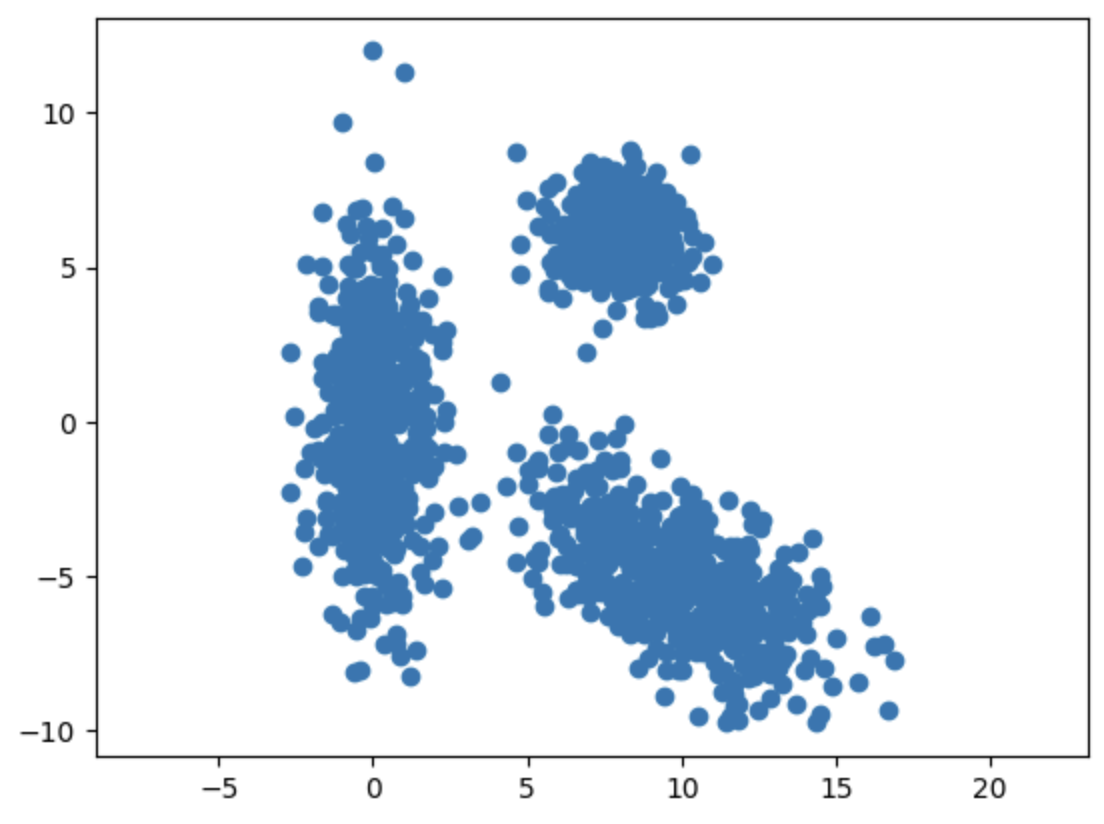

/var/folders/6f/9psv00s129z5d9p39zmzxvyr0000gn/T/ipykernel_15354/2164121151.py:9: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  clusters.append(np.random.multivariate_normal(centroid, covariance, points_per_cluster))


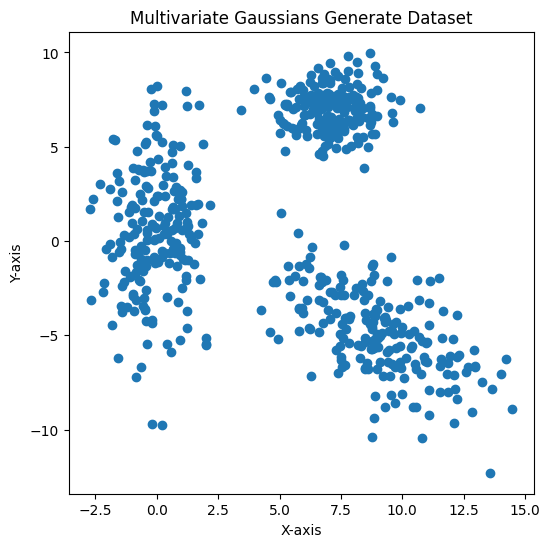

In [181]:
# Your dataset code
import numpy as np
import matplotlib.pyplot as plt

def generate_gaussian_clusters(centroids, covariances, points_per_cluster):
    clusters = []
    for centroid, covariance in zip(centroids, covariances):
        # make points for a multivariate Gaussian distribution
        clusters.append(np.random.multivariate_normal(centroid, covariance, points_per_cluster))
        
    return np.vstack(clusters)

# Dataset:
adjusted_centroids = np.array([[0, 0], [7, 7], [9, -5]])

# Cov:
adjusted_covariances = [
    np.array([[1, 0], [0, 12]]),  
    np.array([[1.25, 0], [0, 1.25]]),
    np.array([[3, -5], [-5, 3]]) 
]

points_per_cluster = 200

# Generate the dataset
dataset = generate_gaussian_clusters(adjusted_centroids, adjusted_covariances, points_per_cluster)

# Plotting the dataset
plt.figure(figsize=(6, 6))
plt.scatter(dataset[:, 0], dataset[:, 1])
plt.title("Multivariate Gaussians Generate Dataset")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

**b**) Write your own k-means algorithm (implement from scratch using `numpy`, not using `sklearn` or other libraries) without using class as a feature.

A few implementation notes:

1. Initialize your cluster centers to be somewhere within the range encompassed by your dataset.
2. Calculate the silhouette score for each $k$ and print the value.


In [182]:
from sklearn.metrics import silhouette_score

maxiterations = 100

# The calculated distances of each point to each cluster center
def calculate_distances(X, centers):
    distances = np.sqrt(((X - centers[:, np.newaxis])**2).sum(axis=2))
    return distances

def kmeans(X, k, max_iters=maxiterations):
    # Assign the cluster centers randomly
    indices = np.random.choice(X.shape[0], k, replace=False)
    #Keeping the initial centers for plotting in the next part of the assignment
    initial_centers = X[indices]
    centers = np.copy(initial_centers)

    for i in range(max_iters):
        # Find the distance to all centroids and assign the closest cluster for all points
        distances = calculate_distances(X, centers)
        closest_cluster = np.argmin(distances, axis=0)

        # For each cluster, recalc the centroid by taking the mean of all points of that cluster
        new_centers = np.array([X[closest_cluster == j].mean(axis=0) for j in range(k)])

        # If the centroids have not changed, the algorithm has converged and we can break
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return closest_cluster, centers, initial_centers

# Function to find the silhouette score given the value of k and a dataset
def compute_silhouettes(X, k_range):
    silhouettes = {}
    for k in k_range:
        cluster_labels, _, _ = kmeans(X, k, maxiterations)
        score = silhouette_score(X, cluster_labels)
        silhouettes[k] = score

        print(f"Silhouette Score for k = {k}: {score:.3f}")
        
    return silhouettes

# Applying k-means clustering to the generated dataset
k_values = range(2, 10) 
silhouette_scores = compute_silhouettes(dataset, k_values)


Silhouette Score for k = 2: 0.503
Silhouette Score for k = 3: 0.654
Silhouette Score for k = 4: 0.589
Silhouette Score for k = 5: 0.529
Silhouette Score for k = 6: 0.436
Silhouette Score for k = 7: 0.511
Silhouette Score for k = 8: 0.373
Silhouette Score for k = 9: 0.365


**c**) Use your k-means algorithm to cluster the dataset. Experiment with different numbers of clusters $k$ ranging from 2 to 6.

A few notes:
1. Make sure you plot the resulting assignments from your model (the data with the predicted class as the colour).
2. Include the $k$ value for each plot in the title of each plot.
3. Plot the initial and final cluster centers in such a way that is clear where the center for each cluster started and ended.
4. Make sure to run the algorithm for a reasonable number of iterations.

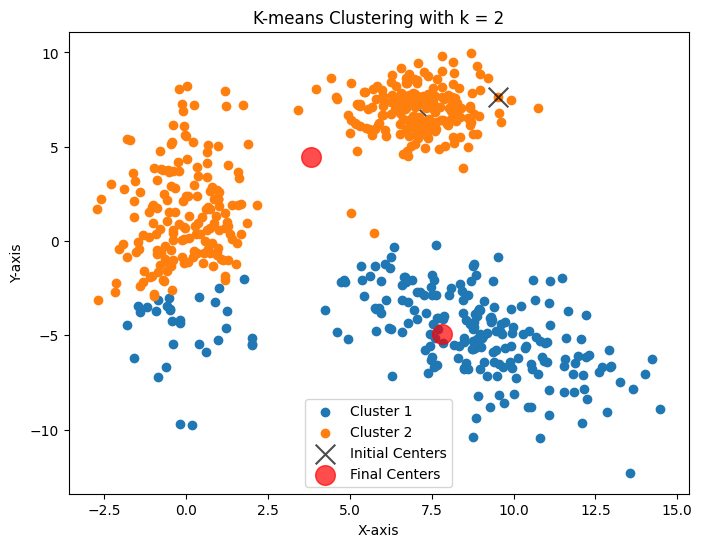

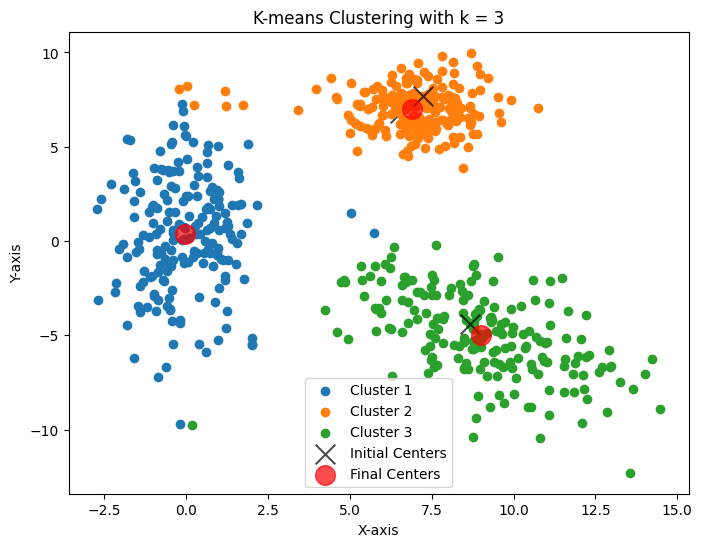

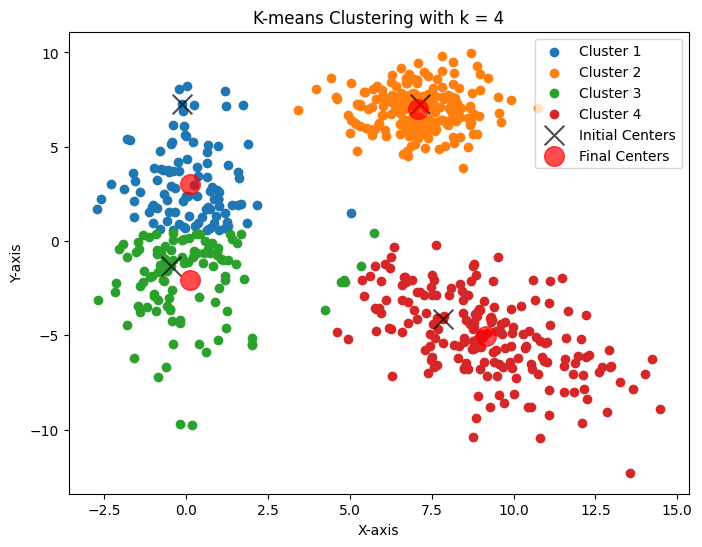

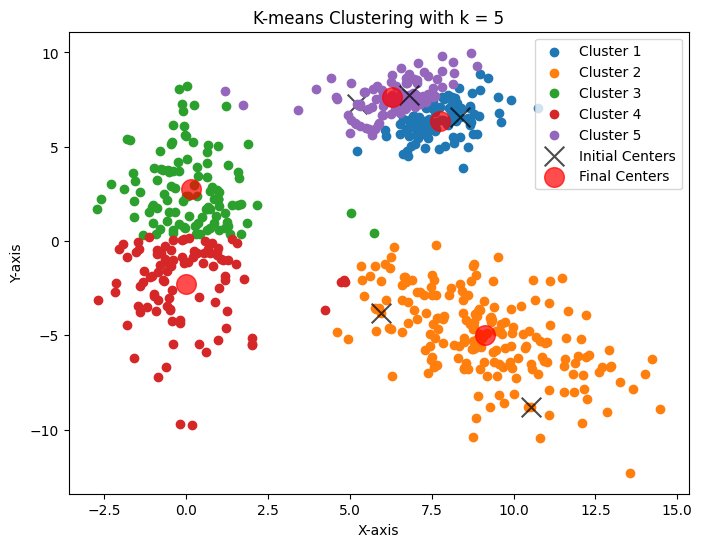

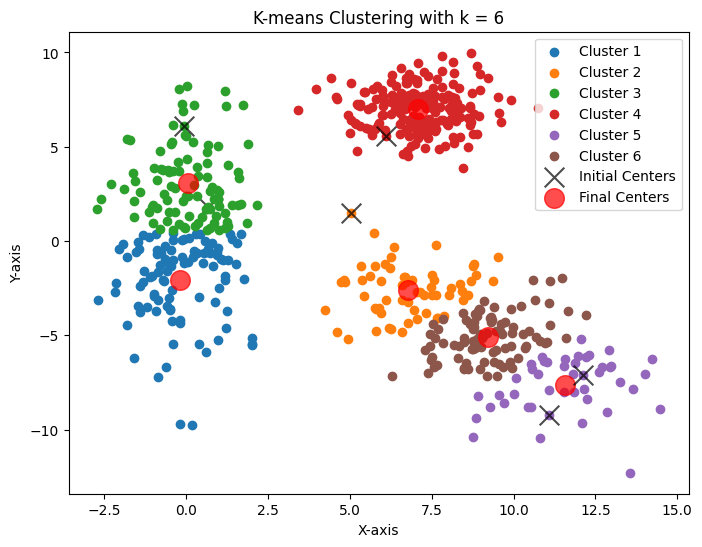

In [183]:
# Run k-means and plot your results

def kmeans_plot(X, k, max_iters=maxiterations):
    closest_cluster, final_centers, initial_centers = kmeans(X, k, max_iters)


    # Plotting the dataset with cluster assignments
    plt.figure(figsize=(8, 6))
    for i in range(k):
        plt.scatter(X[closest_cluster == i, 0], X[closest_cluster == i, 1], label=f"Cluster {i+1}")
        
        # Plot initial and final centers
        plt.scatter(initial_centers[i, 0], initial_centers[i, 1], marker='x', s=200, c="black", alpha=0.7)
        plt.scatter(final_centers[i, 0], final_centers[i, 1], marker='o', s=200, c="red", alpha=0.7)

    #Scattering and plotting nothing as X and O's just to put the X and O's in the "Legend" section of the plots to make it visually better
    plt.scatter([], [], marker='x', s=200, c="black", alpha=0.7, label="Initial Centers")
    plt.scatter([], [], marker='o', s=200, c="red", alpha=0.7, label="Final Centers")


    plt.title(f"K-means Clustering with k = {k}")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.show()

# Performing the k_means/plotting on the dataset with k ranging from 2 to 6
for k in range(2, 7):
    kmeans_plot(dataset, k)


**d**) Analyze your results below, including the information you gained from calculating the silhouette scores. Be sure to include any trends you may have noticed, optimal parameters you found, etc. Don't just state what you saw, explain your findings.

Your discussion:


The silhouette score which is an indication of the performance of the clustering performs the best for k=3 and decreases after that. This is because in the generated dataset, I created the dataset with 3 gaussian clusters. Naturally, the algorithms performs the best with taking 3 clusters when there are actually 3 clusters. For K < 3 the algorithm does not perform as well as expected because there are 3 clusters and the algorithm is trying to fit them into 2, taking centroids that are far from some parts of the dataset, therefore the data assigned to each cluster are not very similar to each or reasonably different from the data from other clusters. As seen in the diagram for k = 2, the data from the cluster on the left is split into two clusters, while they are actually very close to each other and very much far from the center assigned to them by the algorithm.
Similarly as K increases from 3, while data assigned to each cluster are very similar to each other, they are not different enough from some other clusters as seen in the k = 6 diagram especially. For example the algorithm is splitting the left side cluster into two clusters being split roughly at the y = 0 line. While the separated data are similar to the ones assigned to their cluster, they are actually a part of a cohesive and similar bigger cluster but they are being separated due to the value of K being too large. In other for clustering algorithm to work well K needs to be reasonable and not too large or small. Both from the silhouette score and the plots, it is clear that K=3 is optimal and that is indeed through considering that the dataset was generated with 3 gaussian clusters.
That being said the assigning of K = 3 is also not perfect when the data varies a lot from the mean and gets close to other clusters. With K > 4, the algorithm starts to split each coherent cluster into more clusters. With K = 2 the algorithm tries to break one cluster and assign some of them into one cluster and the rest into the second cluster with the other actual cluster.

I also experimented with different number of iterations going from 50 to 1000000. I did not notice any major change in the silhouette score of K = 3, although the score went down by 0.2 closer to 1000000 for K=4,5,6 probably due to overfitting, specifically visually speaking, it is trying to hard to break single clusters apart further and further (it somehow gets stuck into dividing one single cluster into 3 or 4 clusters at K = 6). I also increased the number of points in the dataset from 200 to 3000 and noticed no major changes to the score at K = 3 while the score for K > 3 went up, likely due to more data points making each cluster more cohesive and the algorithm trying to break apart more cohesive data into different clusters.